In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.transforms as mtransforms

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 7.5
plt.rcParams['axes.titlesize'] = 7.5

figw2 = 3.307
figw1 = 6.85


def complete_figure(fig, axes, index):    
    trans = mtransforms.ScaledTranslation(0.02, -0.02, fig.dpi_scale_trans)
    for label, ax in zip(index, axes.flatten()):
        ax.text(0.0, 1.0, '({})'.format(label), transform=ax.transAxes + trans,
                verticalalignment='top', fontfamily='Arial')

In [3]:
file_name = '/home/yihelu/miniconda3/envs/igibson/lib/python3.8/site-packages/igibson/yihe/RobotData/Familiarity360/familiarity_data.txt'
# current_dir = os.getcwd()
# file_name = os.path.join(current_dir, '/RobotData/Familiarity360/familiarity_data.txt')
print(file_name)


with open(file_name) as f:
    lines = f.readlines()

/home/yihelu/miniconda3/envs/igibson/lib/python3.8/site-packages/igibson/yihe/RobotData/Familiarity360/familiarity_data.txt


In [4]:
l, r = np.loadtxt(file_name, delimiter=',', unpack=True)

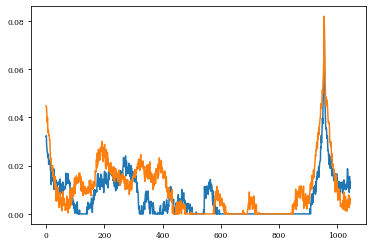

In [5]:
plt.plot(l)
plt.plot(r)

In [6]:
np.nonzero(l >= l[0]), l[966] - l[0], np.argmax(l)

((array([  0,   1, 945, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956,
         957, 958, 959, 960, 961, 962, 963, 966]),),
 0.00028145570270972364,
 955)

In [7]:
np.nonzero(r >= r[0]), r[966] - r[0], np.argmax(r)

((array([  0, 944, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956,
         957, 958, 959, 960, 962, 963, 964, 965, 966]),),
 0.0004570709332488293,
 955)

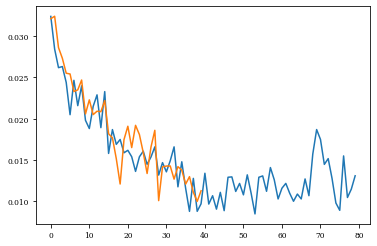

In [8]:
plt.plot(l[966:])
plt.plot(l[:40])

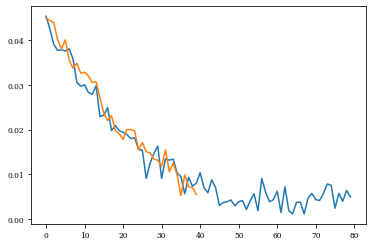

In [9]:
plt.plot(r[966:])
plt.plot(r[:40])

In [10]:
lt, rt = [np.concatenate((lr[955:966], lr[:955])) for lr in (l, r)]

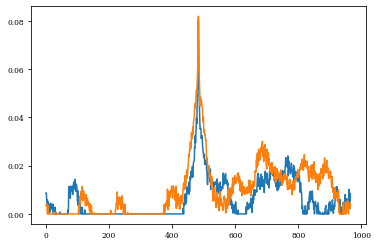

In [11]:
ang = np.concatenate((np.arange(966 / 2) + 966 / 2, np.arange(966 / 2))).astype(int)
plt.plot(lt[ang])
plt.plot(rt[ang])
ll, rr = lt[ang], rt[ang]

In [12]:
np.argmax(ll), np.argmax(rr)

(483, 483)

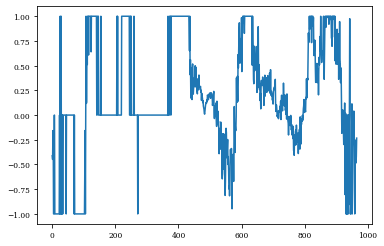

In [13]:
omega = np.true_divide(rr - ll, rr + ll, out=np.sign(rr - ll) * 2, where=rr + ll > 0)
plt.plot(omega)

In [14]:
966 / 360 * 20.7 

55.544999999999995

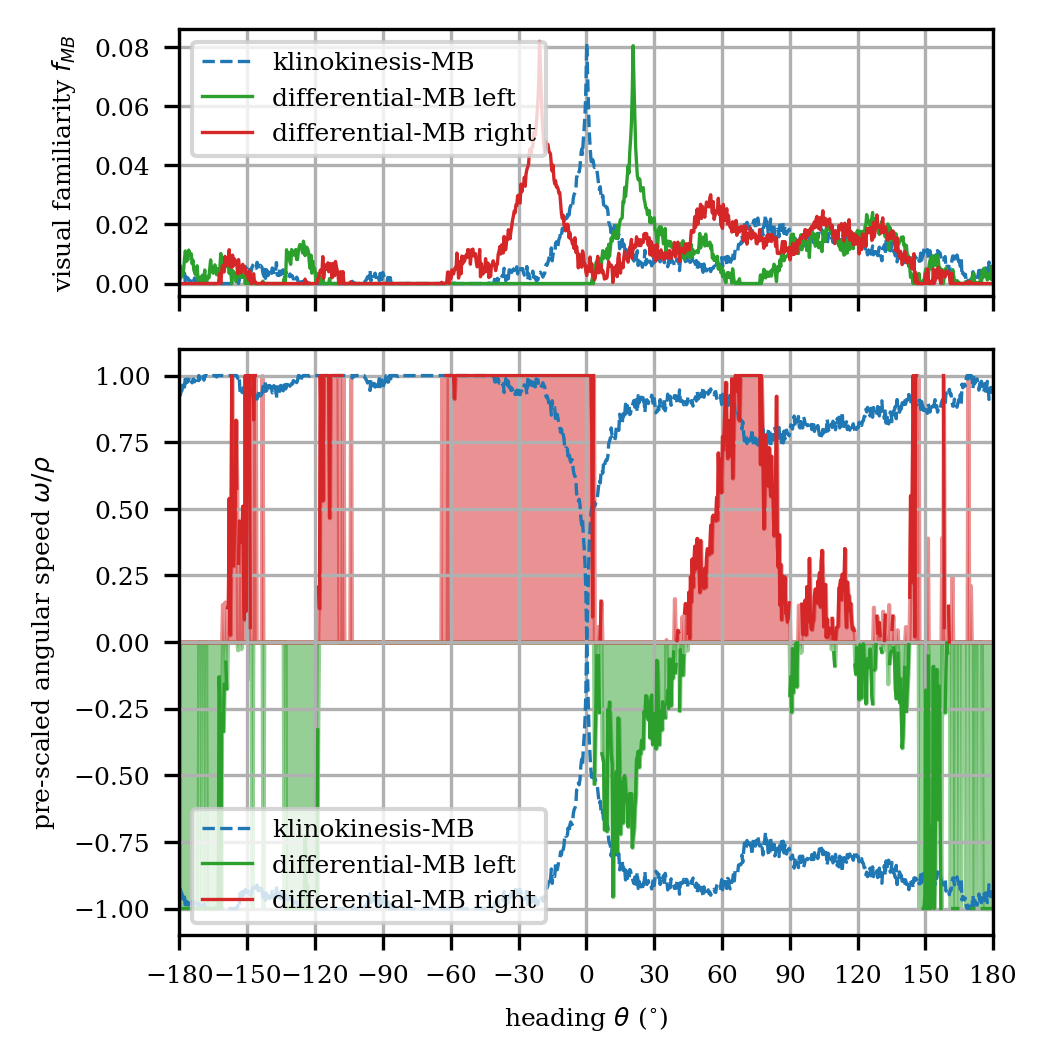

In [15]:
xx = np.linspace(-180, 180, 966)

fig, axes = plt.subplot_mosaic('''A
                                B
                                B''', figsize=(3.5, 4), dpi=300, sharex=True)

lll = np.roll(ll, 55)
rrr = np.roll(rr, -56)
mmm = (ll + rr) / 2

axes['A'].plot(xx, mmm, c='tab:blue', ls='dashed', lw=0.8, label='klinokinesis-MB')
axes['A'].plot(xx, lll, c='tab:green', lw=0.8, label='differential-MB left')
axes['A'].plot(xx, rrr, c='tab:red', lw=0.8, label='differential-MB right')



omeka = 1 - mmm / np.max(mmm)
axes['B'].plot(xx, omeka, c='tab:blue', lw=0.8, ls='dashed', label='klinokinesis-MB')
axes['B'].plot(xx, -omeka, c='tab:blue', lw=0.8, ls='dashed')



omega = np.true_divide(rrr - lll, rrr + lll, out=np.sign(rrr - lll) * 2, where=rrr + lll > 0)


# axes[1].plot(xx, omega, c='k')
axes['B'].fill_between(xx, np.where(omega < 0, omega, 0), 0, alpha=0.5, color='tab:green')
axes['B'].fill_between(xx, np.where(omega > 0, omega, 0), 0, alpha=0.5, color='tab:red')
axes['B'].plot(xx, np.where(omega < 0, omega, np.nan), lw=0.8, color='tab:green', label='differential-MB left')
axes['B'].plot(xx, np.where(omega > 0, omega, np.nan), lw=0.8, color='tab:red', label='differential-MB right')

# axes[1].axhline(0, color='grey')




for ak in 'AB':
    ax = axes[ak]
    ax.set_xticks(np.linspace(-180, 180, 13))
    ax.grid()
    ax.set_xlim(-180, 180)
    ax.xaxis.set_tick_params(labelsize=6)
    ax.yaxis.set_tick_params(labelsize=6)
    
axes['A'].set_ylabel('visual familiarity $f_{MB}$', fontsize=6)
axes['B'].set_ylabel(r'pre-scaled angular speed $\omega/\rho$', fontsize=6)
axes['B'].set_xlabel(r'heading $\theta$ ($^{\circ}$)', fontsize=6)

axes['A'].legend(loc=2, fontsize=6)
axes['B'].legend(loc=3, fontsize=6)

# simulation

In [16]:
from analysis_by_plot import *

def familiarity_summary(data_dir, var_names=[], save_dir=None, headless=True):
#     fig_name = 'familiarity along route'
#     plt.figure(fig_name)
#     plt.xlabel('x (m)')
#     plt.ylabel('y (m)')

#     data_train =  np.load(os.path.join(data_dir, 'Freight_train_0_record.npz'), allow_pickle=True)
#     x, y = data_train['x'], data_train['y']
#     plt.plot(-y, x, label='training route', color='k')

#     data_test =  np.load(os.path.join(data_dir, 'Freight_test_0_record.npz'), allow_pickle=True)
#     x, y = data_test['x'], data_test['y']
#     plt.plot(-y, x, label='sample test trajectory', color='g', marker='o', alpha=0.5)

    ls_var = 'robot_name', 'take_idx', 'x', 'y', 'z', 'rx', 'ry', 'rz', 'extra'
#     for session_idx, data_file in enumerate(os.listdir(data_dir)):
    for Nview, a, m, c in zip((1, 5, 25, 125), (.55, .7, .85, 1), ('solid', 'dotted', '-.', 'dashed'), 'rgbk'):
        data_file = 'Freight_analysis_{}_record.npz'.format(Nview)
        if data_file.endswith('_record.npz') and data_file.startswith('Freight_analysis_'):
            data_path = np.load(os.path.join(data_dir, data_file), allow_pickle=True)
            robot_name, take_idx, x, y, z, rx, ry, rz, extra = [data_path[var] for var in ls_var]
            label = "{}-{}".format(robot_name, take_idx)


            for key in var_names:
                figtit = '{}'.format(key)
                plt.figure(figtit)
                plt.xlabel('epoch')
                fam2 = np.concatenate((extra[()][key][180:], extra[()][key][:-180]))
                plt.plot((fam2 - np.min(fam2)) / (np.max(fam2) - np.min(fam2)),
                         # label='{} view(s) learned'.format(Nview),
                         # c=c, ls=m)
                         )

                # plt.grid('on')
                # plt.legend(loc=0)
                # plt.savefig(os.path.join(save_dir, figtit))

#             plt.figure(fig_name)
#             fam_r, fam_l = extra[()]['fam_r'], extra[()]['fam_l']
#             rot = np.where(fam_r + fam_l <= 0, np.sign(fam_r - fam_l), (fam_r - fam_l) / (fam_r + fam_l)) / 2
#             ridx = np.argwhere(rot >= 0)
#             lidx = np.argwhere(rot < 0)
#             rrot, lrot = np.abs(rot), np.abs(rot)
#             rrot[lidx] = np.nan
#             lrot[ridx] = np.nan
#             rx, ry = familiarity_polar([x[0], y[0]], rrot)
#             lx, ly = familiarity_polar([x[0], y[0]], lrot)
#             plt.plot(-ry, rx, color='r', ls='dotted')
#             plt.plot(-ly, lx, color='b', ls='dashed')
            # fx, fy = familiarity_polar([x[0], y[0]], (fam_r + fam_l) / 50)
            # plt.plot(-fy, fx, color='g')

#     plt.figure(fig_name)
#     plt.plot([], color='r', ls='dotted', label='rightward angle (a.u.)')
#     plt.plot([], color='b', ls='dashed', label='leftward angle (a.u.)')
#     # plt.plot([], color='g', label='familiarity')
#     plt.grid('on')
#     plt.legend(loc=4)
#     plt.gca().set_aspect('equal')
# #     plt.savefig(os.path.join(save_dir, fig_name))
#     plt.xticks([-3, -2, -1, 0, 1, 2, 3])
#     plt.yticks([-1, 0, 1])
#     plt.title('sample trajectory and rotation analysis')


    plt.figure(figtit)
    plt.axvline(180, color='k')
    plt.xticks(np.arange(0, 361, 60), np.arange(-180, 181, 60))
    plt.legend()
    plt.grid()
    plt.ylabel(r'normalised similarity $= 1 -$ normalised distance')
    plt.xlabel('angular offset from correct orientation (deg)')
    plt.title('left familiarity (FlyHash)') # should learn opposite

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


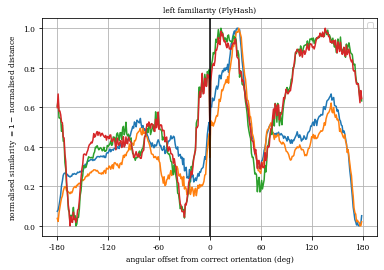

In [17]:
data_dir = '/home/yihelu/miniconda3/envs/igibson/lib/python3.8/site-packages/igibson/yihe/records/mbtest/mbvaryfreq'

familiarity_summary(data_dir, ['fam_r'], headless=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


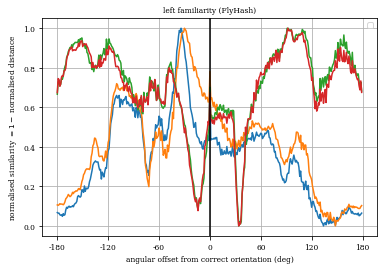

In [18]:
familiarity_summary(data_dir, ['fam_l'], headless=False)

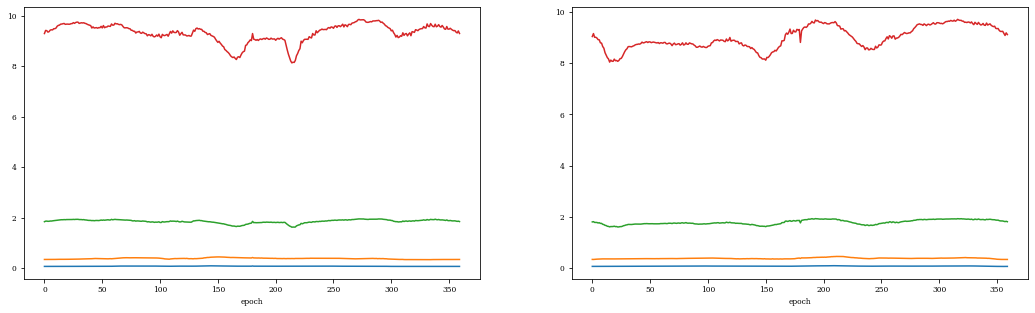

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
var_names = 'fam_l', 'fam_r'
fam_data = {'fam_l': [], 'fam_r': []}

ls_var = 'robot_name', 'take_idx', 'x', 'y', 'z', 'rx', 'ry', 'rz', 'extra'
for Nview, a, m, c in zip((1, 5, 25, 125), (.55, .7, .85, 1), ('solid', 'dotted', '-.', 'dashed'), 'rgbk'):
    data_file = 'Freight_analysis_{}_record.npz'.format(Nview)
    if data_file.endswith('_record.npz') and data_file.startswith('Freight_analysis_'):
        data_path = np.load(os.path.join(data_dir, data_file), allow_pickle=True)
        robot_name, take_idx, x, y, z, rx, ry, rz, extra = [data_path[var] for var in ls_var]
        label = "{}-{}".format(robot_name, take_idx)


        for key, ax in zip(var_names, axes):
            ax.set_xlabel('epoch')
            fam2 = np.concatenate((extra[()][key][180:], extra[()][key][:-180]))
            ax.plot(fam2)
            fam_data[key].append(fam2)



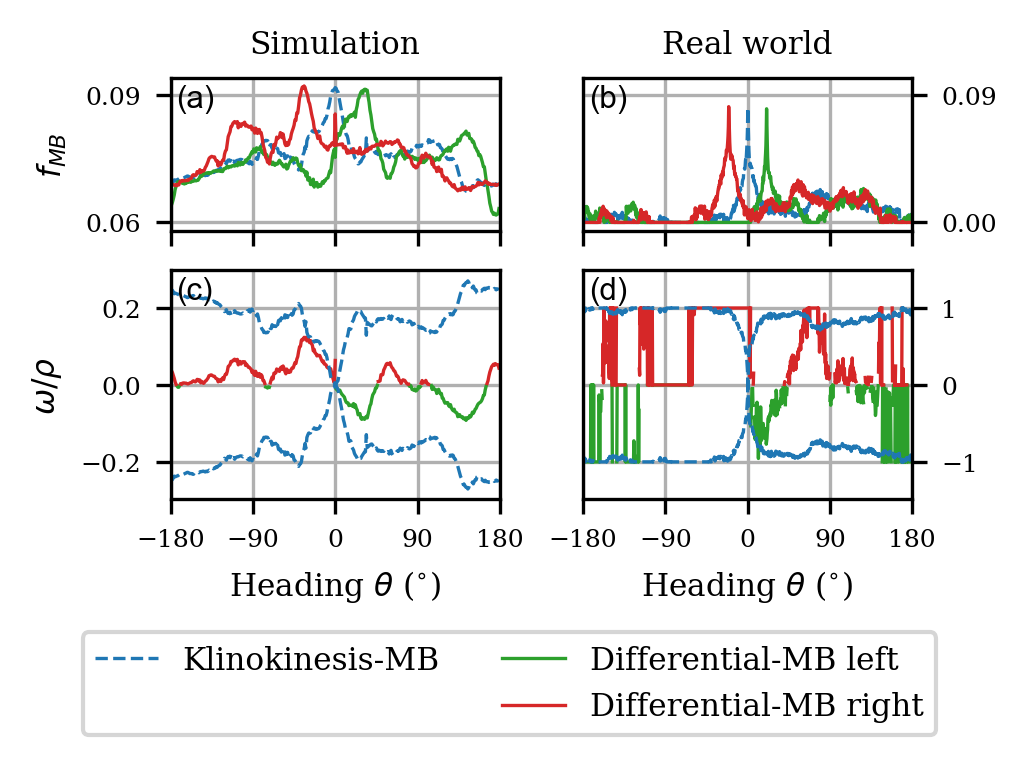

In [20]:
xx = np.linspace(-180, 180, 966)

fig, axs = plt.subplot_mosaic('''ac
                                ac
                                bd
                                bd
                                bd''', figsize=(figw2, 2), dpi=300, sharex=True, layout='constrained')
axes = np.array([[axs['a'], axs['b']], [axs['c'], axs['d']]]).T


lll = np.roll(ll, 55)
rrr = np.roll(rr, -56)
mmm = (np.roll(rrr, 483 - np.argmax(rrr)) + np.roll(lll, 483 - np.argmax(lll))) / 2

axes[0, 1].plot(xx, mmm, c='tab:blue', ls='dashed', lw=0.8, label='Klinokinesis-MB')
axes[0, 1].plot([], [], c='none', label=' ')
axes[0, 1].plot(xx, lll, c='tab:green', lw=0.8, label='Differential-MB left')
axes[0, 1].plot(xx, rrr, c='tab:red', lw=0.8, label='Differential-MB right')

omega = np.true_divide(rrr - lll, rrr + lll, out=np.sign(rrr - lll) * 2, where=rrr + lll > 0)
axes[1, 1].plot(xx, np.where(omega <= 0, omega, np.nan), lw=0.8, color='tab:green')
axes[1, 1].plot(xx, np.where(omega >= 0, omega, np.nan), lw=0.8, color='tab:red')
# axes[1, 1].fill_between(xx, np.where(omega < 0, omega, 0), 0, alpha=0.5, color='tab:green')
# axes[1, 1].fill_between(xx, np.where(omega > 0, omega, 0), 0, alpha=0.5, color='tab:red')

omeka = 1 - mmm / np.max(mmm)
axes[1, 1].plot(xx, omeka, c='tab:blue', lw=0.8, ls='dashed')
axes[1, 1].plot(xx, -omeka, c='tab:blue', lw=0.8, ls='dashed')


###
xa = np.arange(360) - 180
fr, fl = fam_data['fam_l'][0], fam_data['fam_r'][0] # contralateral learning
fm = (np.roll(fr, 180 - np.argmax(fr)) + np.roll(fl, 180 - np.argmax(fl))) / 2

axes[0, 0].plot(xa, fm, c='tab:blue', ls='dashed', lw=0.8)
axes[0, 0].plot(xa, fl, c='tab:green', lw=0.8)
axes[0, 0].plot(xa, fr, c='tab:red', lw=0.8)

omega_sim = np.true_divide(fr - fl, fr + fl, out=np.sign(fr - fl) * 2, where=fr + fl > 0)
axes[1, 0].plot(xa, np.where(omega_sim < 0, omega_sim, np.nan), c='tab:green', lw=0.8)
axes[1, 0].plot(xa, np.where(omega_sim > 0, omega_sim, np.nan), c='tab:red', lw=0.8)


omeka_sim = 1 - fm / np.max(fm)
axes[1, 0].plot(xa, omeka_sim, c='tab:blue', lw=0.8, ls='dashed')
axes[1, 0].plot(xa, -omeka_sim, c='tab:blue', lw=0.8, ls='dashed')


###


for ax in axes.flatten():
    ax.set_xticks(np.linspace(-180, 180, 5))
    ax.grid()
    ax.set_xlim(-180, 180)
    ax.xaxis.set_tick_params(labelsize=6)
    ax.yaxis.set_tick_params(labelsize=6)
    
# axes[0, 0].set_ylabel('Visual\nfamiliarity\n' + r'$f_{MB}$')    
# axes[1, 0].set_ylabel('Pre-scaled\nangular speed\n' + r'$\omega/\rho$')

axes[0, 0].set_ylabel(r'$f_{MB}$')    
axes[1, 0].set_ylabel(r'$\omega/\rho$')

axes[0, 0].set_title('Simulation')
axes[0, 1].set_title('Real world')

for ax in axes[1]:
    ax.set_xlabel(r'Heading $\theta$ ($^{\circ}$)')

for ax in axes.T[1]:
    ax.yaxis.tick_right()
    
    
axes[0, 0].set_ylim(0.058, 0.094)
axes[0, 1].set_ylim(-0.006, 0.102)
axes[0, 0].set_yticks(np.arange(0.06, 0.091, 0.03))
axes[0, 1].set_yticks(np.arange(0, 0.091, 0.09))

yl = axes[1, 0].get_ylim()[1] * 5
axes[1, 1].set_ylim(-yl, yl)

plt.figlegend(ncol=2, loc='upper left', bbox_to_anchor=(0.05, 0))

complete_figure(fig, axes, 'abcd')


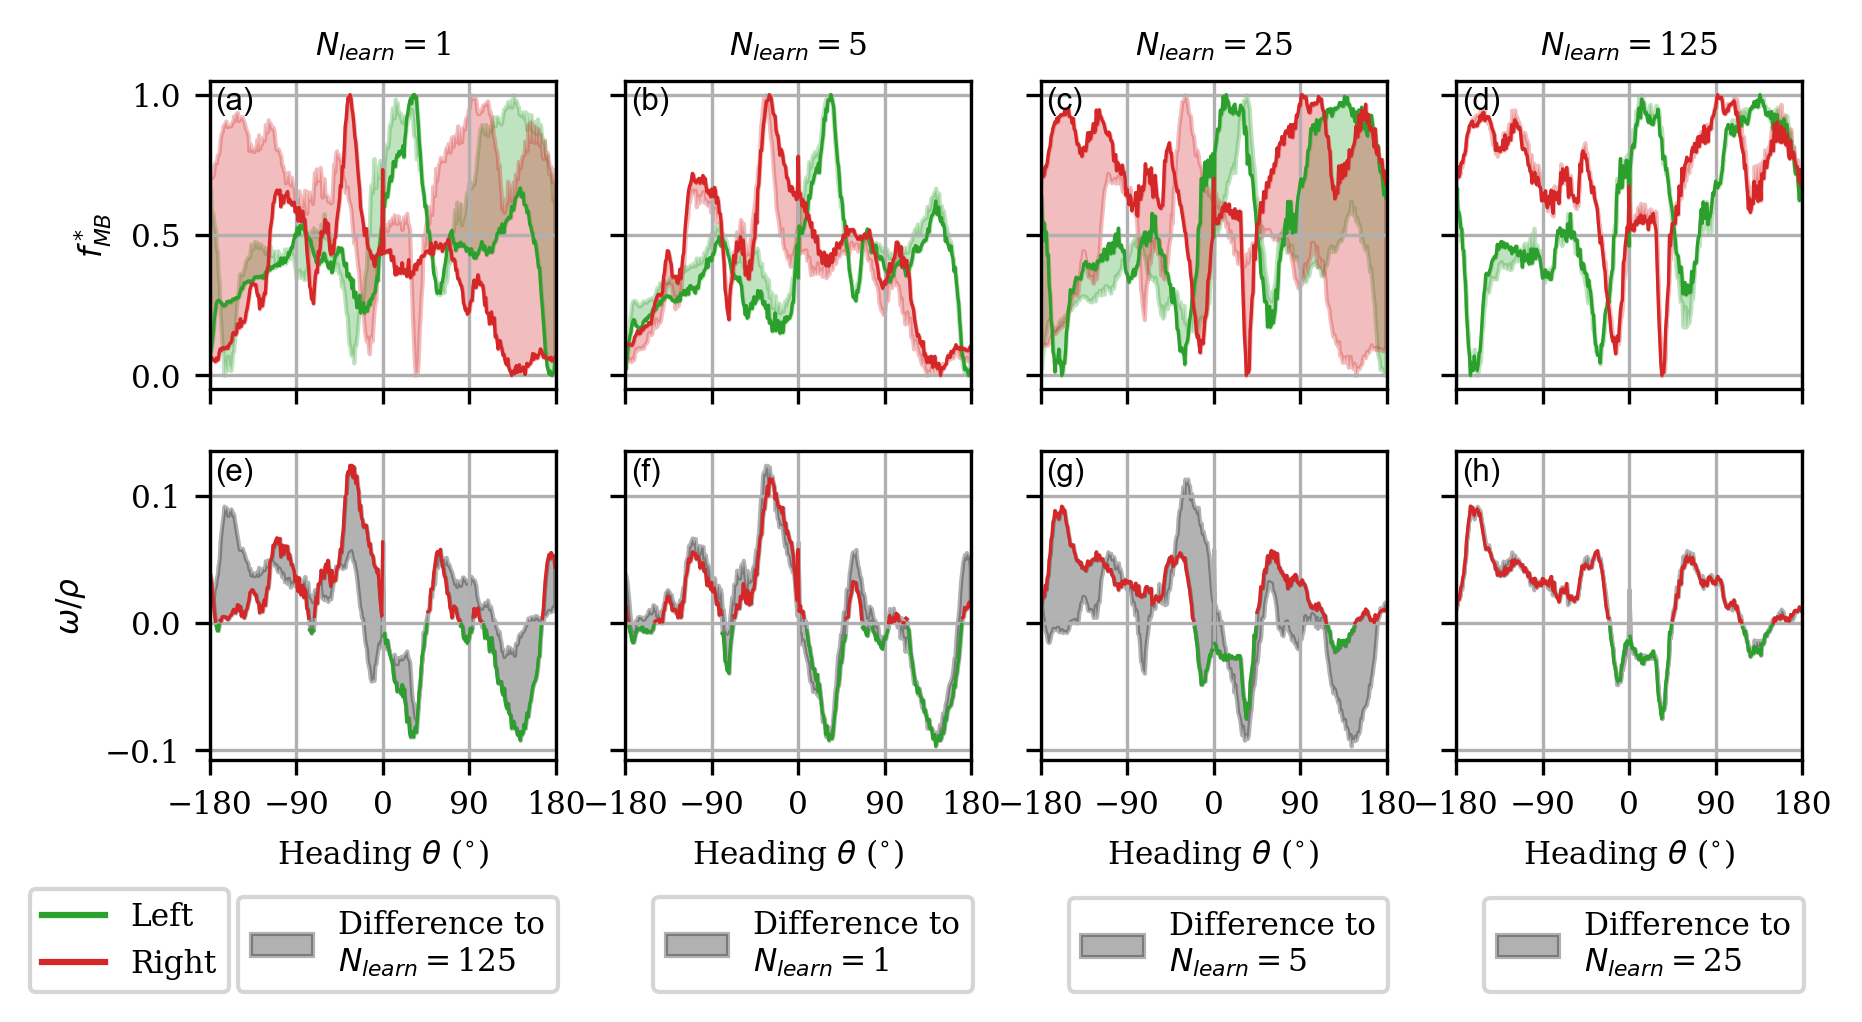

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(figw1, 3), dpi=300, sharex=True, sharey='row')

lastnormr = None
for idx, (axcol, fr, fl) in enumerate(zip(axes.T, fam_data['fam_l'], fam_data['fam_r'])):
    lfl, lfr = fam_data['fam_r'][idx-1], fam_data['fam_l'][idx-1]
    lastnorml, lastnormr, norml, normr = [(ff - np.min(ff)) / (np.max(ff) - np.min(ff)) for ff in (lfl, lfr, fl ,fr)]
    axcol[0].plot(xa, norml, c='tab:green', lw=0.8)
    axcol[0].plot(xa, normr, c='tab:red', lw=0.8)
    
    omega_sim = np.true_divide(fr - fl, fr + fl, out=np.sign(fr - fl) * 2, where=fr + fl > 0)
    lastomega_sim = np.true_divide(lfr - lfl, lfr + lfl, out=np.sign(lfr - lfl) * 2, where=lfr + lfl > 0)

#     axcol[1].fill_between(xa, np.where(omega_sim < 0, omega_sim, 0), 0, color='g', label='left')
#     axcol[1].fill_between(xa, np.where(omega_sim > 0, omega_sim, 0), 0, color='r', label='right')
#     axcol[1].fill_between(xa, np.where(omega_sim < 0, omega_sim, 0), 0, alpha=0.2, color='g')
#     axcol[1].fill_between(xa, np.where(omega_sim > 0, omega_sim, 0), 0, alpha=0.2, color='r')
    axcol[1].plot(xa, np.where(omega_sim < 0, omega_sim, np.nan), lw=0.8, color='tab:green')
    axcol[1].plot(xa, np.where(omega_sim > 0, omega_sim, np.nan), lw=0.8, color='tab:red')
    axcol[1].fill_between(xa, omega_sim, lastomega_sim, alpha=0.3, color='k')
    
    
    axcol[0].fill_between(xa, lastnorml, norml, color='tab:green', alpha=0.3)
    axcol[0].fill_between(xa, lastnormr, normr, color='tab:red', alpha=0.3)
    
#     axcol[0].plot(xa, lastnorml, color='k', lw=0.5, ls='dashed')
#     axcol[0].plot(xa, lastnormr, color='k', lw=0.5, ls='dashed')
#     axcol[1].plot(xa, lastomega_sim, color='k', lw=0.5, ls='dashed')
   

    
for ax in axes.flatten():
    ax.set_xticks(np.linspace(-180, 180, 5))
    ax.grid()
    ax.set_xlim(-180, 180)
#     ax.xaxis.set_tick_params(labelsize=6)
#     ax.yaxis.set_tick_params(labelsize=6)
    
axes[0, 0].plot([], [], color='tab:green', label='Left')
axes[0, 0].plot([], [], color='tab:red', label='Right')
fig.legend(loc='lower left', bbox_to_anchor=(0.03, -0.15))
    
for ax, n_image in zip(axes[0], (1, 5, 25, 125)):
    ax.set_title('$N_{learn}=$' + '{}'.format(n_image))
    
for ax, n_image in zip(axes[1], (125, 1, 5, 25)):
    ax.set_xlabel(r'Heading $\theta$ ($^{\circ}$)')
  
    ax.fill_between([], [], [], color='k', alpha=0.3, label='Difference to\n$N_{learn}=$' + '{}'.format(n_image))
    ax.legend(loc='lower right', bbox_to_anchor=(1.05, -0.8))
    
# axes[0, 0].set_ylabel('normalised visual\nfamiliarity ' + r'$f_{MB}^*$')    
# axes[1, 0].set_ylabel('pre-scaled angular\nspeed ' + r'$\omega/\rho$')

axes[0, 0].set_ylabel(r'$f_{MB}^*$')    
axes[1, 0].set_ylabel(r'$\omega/\rho$')


complete_figure(fig, axes, 'abcdefgh')
